# GRÁFICOS 2D-3D PARTE II

Lembrando que há vários *backends* disponíveis. O melhor lugar para aprender é na [documentação (em inglês)](https://docs.juliaplots.org/latest/), onde há uma série de [exemplos](https://docs.juliaplots.org/latest/examples/gr/).

## GRÁFICO DE UMA FUNÇÃO PARTE II

**Funções Genéricas, Anônimas e Expressões Simbólicas**

### GRÁFICO FUNÇÃO GENÉRICA

sintaxe:
```julia
plot(x_vetor, função_genérica, label = "nome", outras_opções) 
ou 
plot(função_genérica, x_vetor, label = "nome", outras_opções)
```

Para adicionar a um gráfico já existente, use `plot!`.

**Melhorando o Gráfico: Características dos atributos**
+ Line
        line = (:steppre, :dot, :arrow, 0.5, 4, :red)
        seriestype = :steppre,
        linestyle = :dot,
        arrow = :arrow,
        linealpha = 0.5,
        linewidth = 4,
        linecolor = :red)

+ Mark
        m = (:hexagon, 20, 0.6, :green, stroke(3, 0.2, :black, :dot))
        markershape = :hexagon
        markersize = 20,
        markeralpha = 0.6,
        markercolor = :green,
        markerstrokewidth = 3,
        markerstrokealpha = 0.2,
        markerstrokecolor = :black,
        markerstrokestyle = :dot)
        
+ Fill
       fill = (0, 0.5, :red)
       fillrange = 0,
       fillalpha = 0.5,
       fillcolor = :red)
+ Axis
       xaxis = ("my label", (0,10), 0:0.5:10, :log, :flip, font(20, "Courier"))
       xlabel = "my label",
       xlims = (0,10),
       xticks = 0:0.5:10,
       xscale = :log,
       xflip = true,
       xtickfont = font(20, "Courier"))
+ Background
+ Foreground
+ Dpi
+ html_output_format
+ size


In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
# vetor x definido como os pontos de 0 a 10 dividos de 0.5 em 0.5

vetor_x = 0:0.5:10
f2(x) = sin(x)*x

f2 (generic function with 1 method)

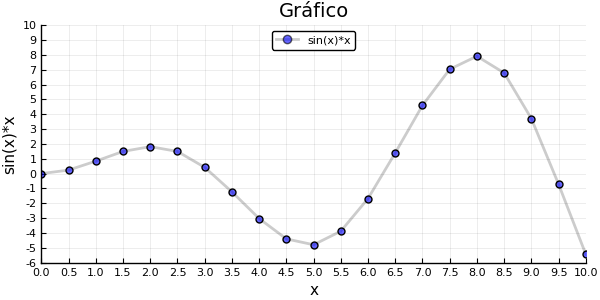

In [3]:
plot(vetor_x, f2, 
     label  = "sin(x)*x", 
     xlabel = "x" , 
     ylabel = "y", 
     title  = "Gráfico",
     size   = (600, 300), 
     line   = (:line, 2 , 0.2, :black),  
     marker = (:circle, 5, 0.6, :blue), 
     xaxis  = ("x", (0 , 10),  0:0.5:10),
     yaxis  = ("sin(x)*x", (-6, 10), -6:1:10),
     legend = :top
)

### GRÁFICO FUNÇÃO ANÔNIMA 

Sintaxe:
```julia
plot(var -> expressão_variável, vetor_x , label = "nome", outras_opções)

plot(vetor_x , var -> expressão_variável, label = "nome", outras_opções)
```
Também pode ser utilizado `scatter e bar`

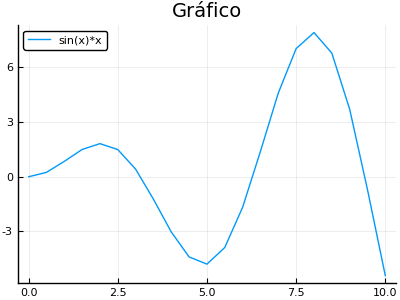

In [4]:
# vetor x definido como os pontos de 0 a 10 dividos de 0.5 em 0.5
plot(x -> sin(x)*x, 0:0.5:10, label = "sin(x)*x", title = "Gráfico", size = (400, 300))

Melhorando

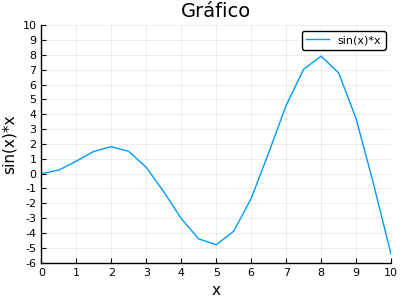

In [5]:
# vetor x definido como os pontos de 0 a 10 dividos de 0.5 em 0.5
plot(x -> sin(x)*x, 0:0.5:10, 
     label = "sin(x)*x", 
     title = "Gráfico",
     size = (400, 300),
     xaxis = ("x", (0 , 10),  0:1:10),
     yaxis = ("sin(x)*x", (-6, 10), -6:1:10)
)

### GRÁFICO EXPRESSÃO SIMBÓLICA 

Sintaxe:
```julia
plot(x_vetor, expressao_simbólica, label = "nome", outras_opções) 

plot(expressão_simbólica, x_vetor, label = "nome", outras_opções) 

```

In [6]:
using SymPy
@syms x

(x,)

In [7]:
# vetor x definido como os pontos de 0 a 10 dividos de 0.5 em 0.5
fs1 = sin(x)*x

x⋅sin(x)

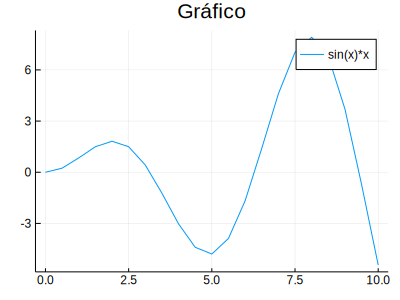

In [8]:
vetor_x = 0:0.5:10
gr()
plot(vetor_x, fs1,  label = "sin(x)*x", title = "Gráfico", size = (400, 300) )

Melhorando

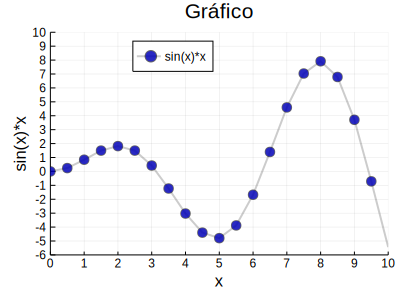

In [9]:
plot(vetor_x, fs1, 
     label  = "sin(x)*x", 
     xlabel = "x" , 
     ylabel = "y", 
     title  = "Gráfico",
     size   = (400,300), 
     line   = (:line, 2 , 0.2, :black),  
     marker = (:circle, 5, 0.6, :blue), 
     xaxis  = ("x", (0 , 10),  0:1:10),
     yaxis  = ("sin(x)*x", (-6, 10), -6:1:10),
     legend = :top
)    

## GRÁFICOS MULTIPLOS PARTE II

### GRÁFICOS SOBREPOSTOS GERADOS UM APÓS O OUTRO 

In [10]:
vetor_x = 0:0.1:2*pi
fg3(x) = sin(x)

fg3 (generic function with 1 method)

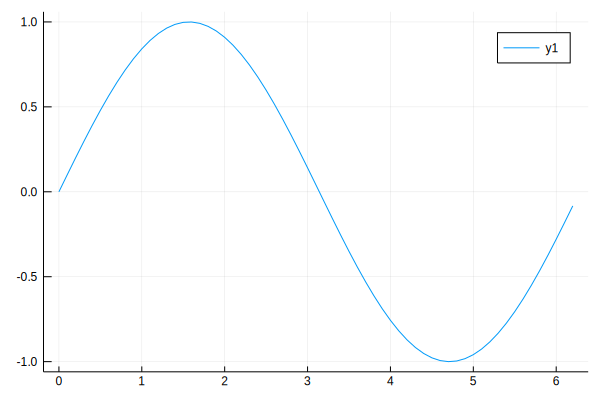

In [11]:
plot(vetor_x, fg3.(vetor_x))

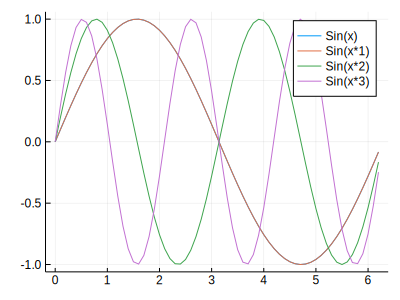

In [12]:
plot_mult = plot(vetor_x, fg3, label = "Sin(x)")

for i = 1:3    
    plot_mult = plot!(vetor_x, fg3.(vetor_x*i), label= ("Sin(x*$i)"))
    
end
plot(plot_mult, size = (400,300))

**Exemplo**

In [13]:
using DataFrames, CSV

In [14]:
dados_alunos = CSV.read("dados_alunos.csv")

,Nome,Nota1,Nota2,Nota3
,String,Float64,Float64,Float64
1,Pedro,5.0,8.5,7.0
2,Alvaro,10.0,9.5,10.0
3,Luis,7.0,2.5,5.5
4,Ricardo,3.5,5.5,5.0


In [15]:
dados_alunos[!, 1]

4-element CSV.Column{String,String}:
 "Pedro"  
 "Alvaro" 
 "Luis"   
 "Ricardo"

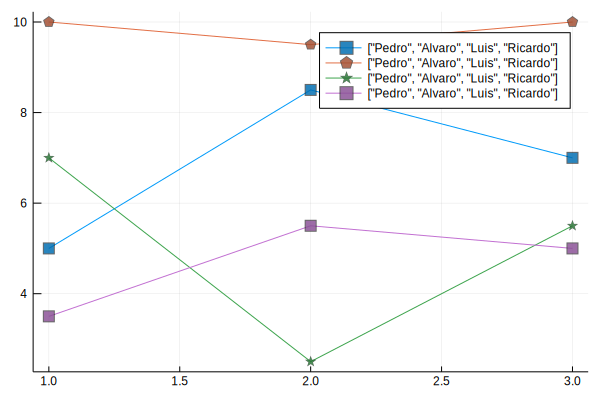

In [16]:
plot([dados_alunos[!, 2] dados_alunos[!, 3] dados_alunos[!, 4]]', 
    m = ([:r :p :s], 5, 0.6), label = dados_alunos[!, 1])

### GRÁFICOS MÚLTIPLOS LADO A LADO

Horizontal
```julia
plot(p1, p2, ... ,pn layout = @layout([p1 p2 ... pn]), opções) 
```
Vertical
```julia
plot(p1, p2, ... ,pn layout = @layout([p1; p2; ... pn]), opções) 
```

In [17]:
# funções
fg4(x) = sin(x)*x
fg5(x) = cos(x)*x

fg5 (generic function with 1 method)

**Horizontal**

In [18]:
vetor_x = 0 : 0.5 : 3*pi

0.0:0.5:9.0

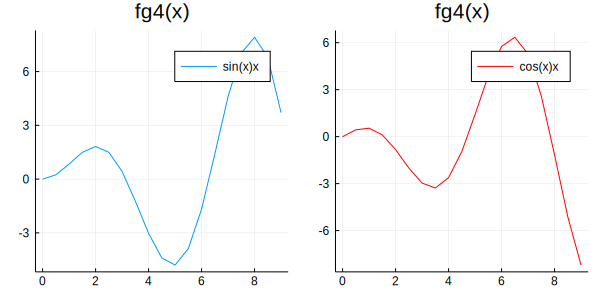

In [19]:
p1 = plot(vetor_x, fg4, title="fg4(x)", label="sin(x)x")
p2 = plot(vetor_x, fg5, title="fg4(x)", label="cos(x)x", color = (:red))

plot(p1, p2, layout = (1, 2), size =(600, 300))

**Vertical**

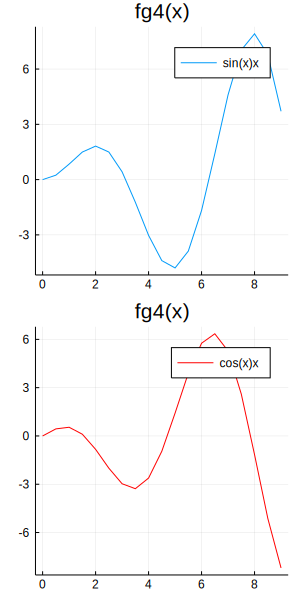

In [20]:
p1 = plot(vetor_x, fg4, title="fg4(x)", label="sin(x)x")
p2 = plot(vetor_x, fg5, title="fg4(x)", label="cos(x)x", color = (:red))

plot(p1, p2, layout = (2, 1), size =(300, 600))

## GRÁFICO EQUAÇÃO PARAMÉTRICA

In [21]:
using Plots
plotly()

plot(sin,(x-> sin(2*x)), 0 , 2*pi, size = (400, 300))

<!DOCTYPE html>
 
 
 Plots.jl

**Gráfico superficie equação paramétrica com SymPy**

O gráfico é uma superfície tridimensional. Sintaxe:
```julia
plot_parametric_surface((função_2, função_2, função_3), (x, a, b), (y, a, b))
```

In [22]:
using SymPy
@syms x y

(x, y)

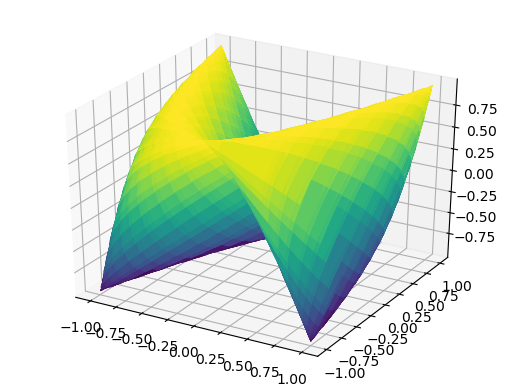

In [23]:
plot_parametric_surface((sin(x), sin(x - y), sin(x + y)), (x, 0, 2*pi), (y, 0, 2*pi));

## GRÁFICO CONTORNO E CURVAS DE NIVEL



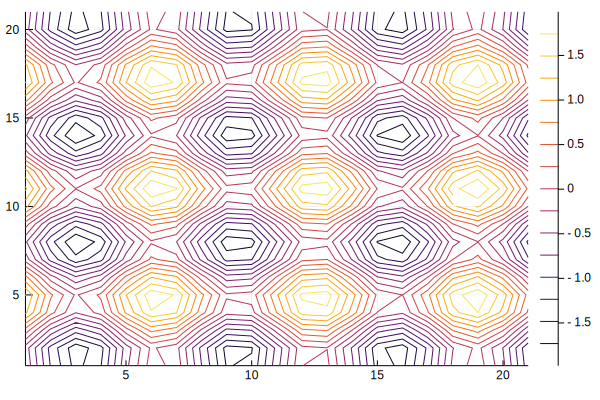

In [24]:
using Plots
gr()

z = [cos(x) + sin(y) for x = -10:10, y = -10:10]
contour(z)

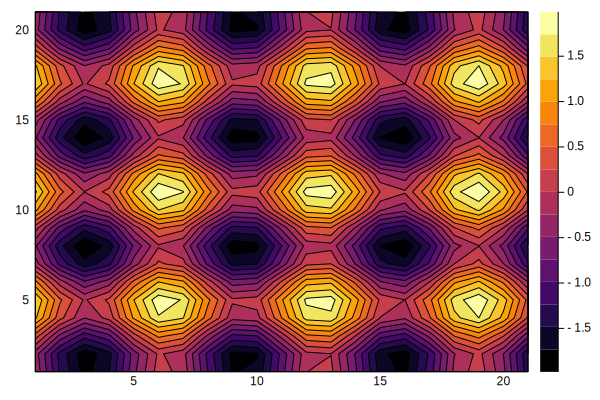

In [25]:
z = [cos(x) + sin(y) for x = -10:10, y = -10:10]
contourf(z)

## GRÁFICO MAPA CALOR

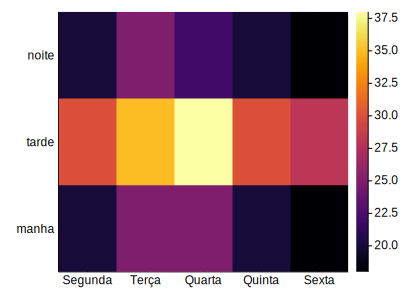

In [26]:
using Plots
gr()

dias = ["Segunda","Terça","Quarta","Quinta","Sexta" ]
turno = ["manha", "tarde", "noite"]
temp = [20 25 25 20 18;  30 35 38 30 28;    20 25 22 20 18 ]

heatmap(dias,turno,temp, size = (400, 300))

Mapa aplicado a uma matriz definida por uma função

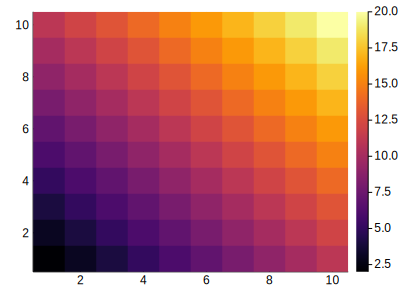

In [27]:
using Plots
gr()

z = [x + y for x = 1:10, y = 1:10]
heatmap(z, size = (400,300))

In [28]:
# para ver a matriz z
z

10×10 Array{Int64,2}:
  2   3   4   5   6   7   8   9  10  11
  3   4   5   6   7   8   9  10  11  12
  4   5   6   7   8   9  10  11  12  13
  5   6   7   8   9  10  11  12  13  14
  6   7   8   9  10  11  12  13  14  15
  7   8   9  10  11  12  13  14  15  16
  8   9  10  11  12  13  14  15  16  17
  9  10  11  12  13  14  15  16  17  18
 10  11  12  13  14  15  16  17  18  19
 11  12  13  14  15  16  17  18  19  20

## GRÁFICOS 3D PARTE II

#### GRÁFICO DE LINHAS

Sintaxe:
```julia
using Plots
pyplot()
    plot( vetor_x , vetor_y , vetor_z, opções )    
ou    
    # o ponto "." serve para calcular a função elemento por elemento do vetor
    plot( vetor_x/função_f.(vetor) ,vetor_y/função_g.(vetor) , vetor_z/função_h.(vetor), opções)
```

In [29]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [30]:
vetor_x = 1:10

1:10

In [31]:
f6(x) = x^2
f7(x) = x^3

f7 (generic function with 1 method)

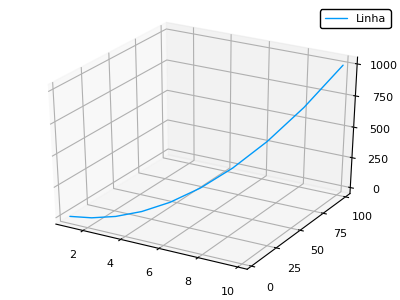

In [32]:
plot( vetor_x , f6.(vetor_x) , f7.(vetor_x), label = "Linha", size = (400,300) )

In [33]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [34]:
vetor_x = LinRange(-5, 5, 300)
vetor_y = LinRange(-5, 5, 300)

zf(x) = sin(x)*x

zf (generic function with 1 method)

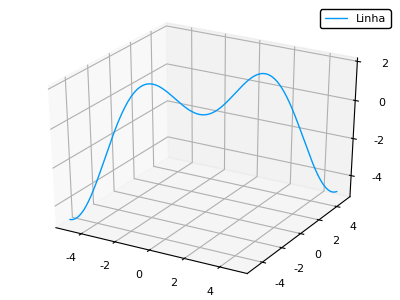

In [35]:
plot(vetor_x , vetor_y , zf.(vetor_x) , label = "Linha", size = (400,300) )

#### GRÁFICO DE SUPERFÍCIE

Por padrão, a figura será colorida em tons de uma cor sólida, mas também suporta mapeamento de cores.
```julia
vetor_x 
vetor_y ou função previamente calculada
vetor_z ou função previamente calculada
surface( x, y, z, argumentos);
```
Argumentos:

In [36]:
using Plots
gr()

Plots.GRBackend()

In [37]:
f1(x,y) = cos(x) + sin(y)

f1 (generic function with 1 method)

In [38]:
vetor_x = 0:0.5:10
vetor_y = 0:0.5:10

0.0:0.5:10.0

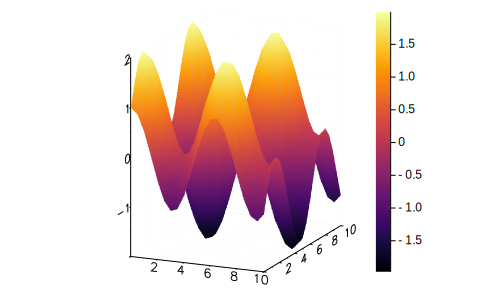

In [39]:
surface(vetor_x, vetor_y, f1, size = (500,300))

Outra maneira utilizando Compreensão de Lista. Uma das vantagens dela é a velocidade na geração da matriz.

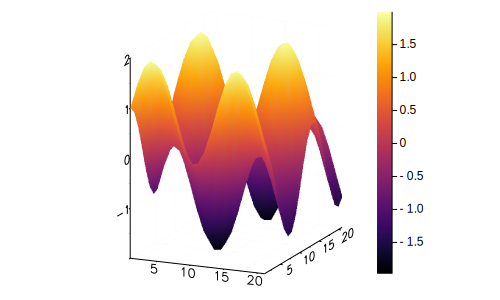

In [40]:
f2xy = [cos(x) + sin(y) for x = vetor_x ,  y = vetor_y]
surface(f2xy,  size = (500, 300))

#### GRAFICO CONTORNO 3D

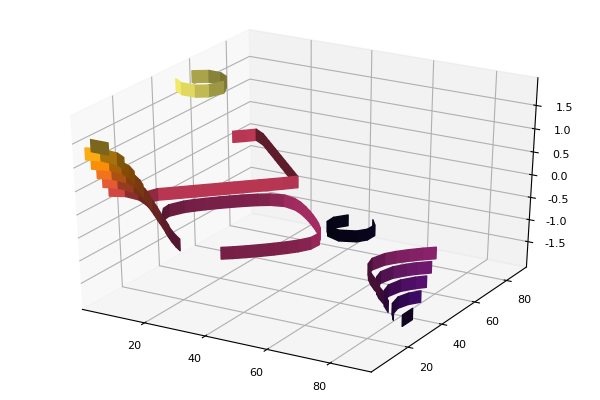

In [41]:
using Plots
pyplot()

z = [cos(x) + sin(y) for x = 1:0.1:10  , y = 1:0.1:10]

contour3d(z)

## INTERATIVIDADE 

a macro `@manipulate` do pacote `Interact` em conjunto com um pacote gráfico, permite construir gráficos interativos. Os melhores pacotes para este recurso são o GR (melhor opção) e o PyPlot em função da velocidade na geração e consistência do gráfico gerado.

In [42]:
using Plots, Interact
gr() # funciona melhor que Plotly e PyPlot

@manipulate for Grau = 0:10, Coef  = -10:10
    plot(-10:10, x -> Coef*x^Grau + Coef*x + 5, size = (400, 300)) # função anonima
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16890009734008273338\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5461668732975625839\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16890009734008273338\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Grau"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 10,:min => 0,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/pedrohnv/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/pedrohnv/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/pedrohnv/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/pedrohnv/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/pedrohnv/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f4bc0ad5390, Task (runnable) @0x00007f4bc0ad5390), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"9274333022771694553\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\

In [43]:
using Plots, Interact
gr() # o gr funciona melhor que PlotlyJS e PyPlot

@manipulate for Grau = 0:10
    
    vetor_x = LinRange(-5, 5, 300)
    vetor_y = LinRange(-5, 5, 300)

    zf(x,y) = x^Grau + y^Grau

    plot(vetor_x , vetor_y , zf.(vetor_x,vetor_y),label = "Linha", size = (400,300) )
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Grau"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 10,:min => 0,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/pedrohnv/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/pedrohnv/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/pedrohnv/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/pedrohnv/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/pedrohnv/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f4bd352ebf0, Task (runnable) @0x00007f4bd352ebf0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"677036553758685772\",\"id\":\"ob_12\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"

## Gráfico Animado

**Atenção:** os programas *convert* ou *ffmpeg* devem estar disponíveis para gerar a animação. Use o comando `gif(anim, filename, fps=15)` para salver.

In [44]:
p = plot([sin, cos], zeros(0), leg=false)
anim = Animation()
for x = range(0, stop=10π, length=100)
    push!(p, x, Float64[sin(x), cos(x)])
    frame(anim)
end

## Gráficos de Equações Implícitas

O pacote [ImplicitEquations](https://github.com/jverzani/ImplicitEquations.jl) implementa algoritmos para criar gráficos de equações implícitas. [Link para outros exemplos.](https://nbviewer.jupyter.org/github/jverzani/ImplicitEquations.jl/blob/master/docs/examples.ipynb)

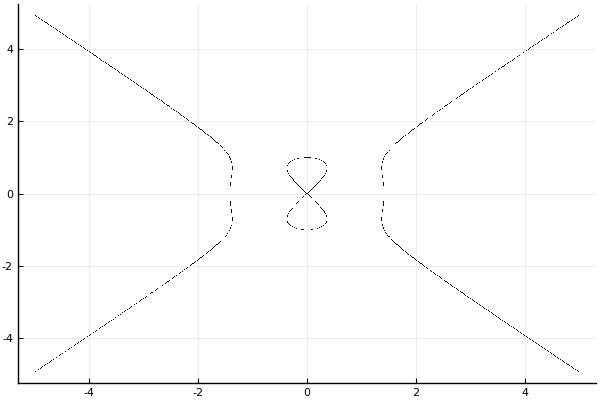

In [47]:
using Plots
pyplot()
using ImplicitEquations

a,b = -1,2
f(x,y) = y^4 - x^4 + a*y^2 + b*x^2
#plot(f ⩵ 0)  # \Equal[tab]
plot(ImplicitEquations.Eq(f, 0)) # porquê há conflito com o ⩵ do sympy